In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

In [2]:
data=pd.read_csv('patient data.csv')
data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})
data['No-show'] = data['No-show'].replace({'No' : 1 , 'Yes' : 0})
data=data.drop('Neighbourhood',axis=1)
data[data.isnull().any(axis=1)]

C:\Users\kishore\AppData\Local\Temp\ipykernel_44380\679135742.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})
C:\Users\kishore\AppData\Local\Temp\ipykernel_44380\679135742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['No-show'] = data['No-show'].replace({'No' : 1 , 'Yes' : 0})


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [4]:
data.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,0,1,0,0,0,0,1
1,1,56,0,0,0,0,0,0,1
2,0,62,0,0,0,0,0,0,1
3,0,8,0,0,0,0,0,0,1
4,0,56,0,1,1,0,0,0,1


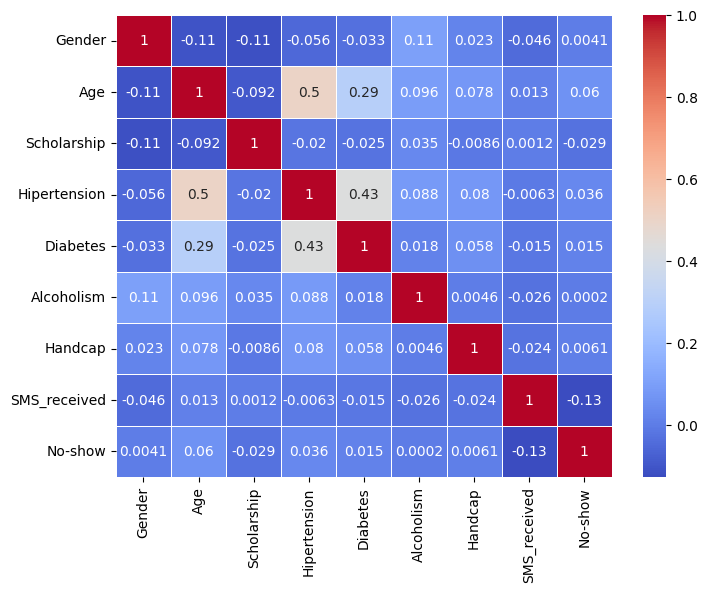

In [5]:
correlation_matrix = data.corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

In [6]:
features=["Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
target="No-show"

In [7]:
train_f,test_f,train_t,test_t=train_test_split(data[features],data[target],random_state=0)
model=LinearRegression()
model.fit(train_f,train_t)
prediction = model.predict(test_f)

In [8]:
prediction=np.round(prediction,2)


In [9]:
error=mean_absolute_error(test_t,prediction)
error

0.31383142733063113

In [10]:
results=test_f.copy()
results['Actual']=test_t
results['Predicted']=prediction
results

,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Actual,Predicted
78500,0,0,0,1,0,1,0.83
21891,1,1,0,0,0,1,0.86
89006,0,0,0,0,0,1,0.83
36681,1,0,0,0,0,1,0.86
22388,0,0,0,0,0,0,0.83
...,...,...,...,...,...,...,...
59376,0,0,0,0,1,1,0.72
50299,0,0,0,0,0,1,0.83
92950,0,0,0,0,1,1,0.72
66187,0,0,0,0,1,1,0.72
